In [16]:
# from sklearn import preprocessing

# [data['Amount']] = preprocessing.normalize([data['Amount']], norm='l2')
# [data['Time']] = preprocessing.normalize([data['Time']], norm='l2')
import pandas as pd
import matplotlib.pyplot as plt

# Load the credit card data
data = pd.read_csv('Datasets\FinalCreditCard.csv')

fraudulent = data[data['Class'] == 1]
non_fraudulent = data[data['Class'] == 0]

# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import RobustScaler

# RobustScaler is less prone to outliers.

rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# coloca em ordem no df
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

fraudulent = data[data['Class'] == 1]
non_fraudulent = data[data['Class'] == 0]

data.head()

# Amount and Time are Scaled!

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.303559,-0.909889,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.210643,-0.909889,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,6.222793,-0.909450,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.856605,-0.909450,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.940965,-0.909011,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

X = data.drop('Class', axis=1)
y = data['Class']

# extraindo os dados de treino (70%)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Check the Distribution of the labels


# Turn into an array
# original_Xtrain = original_Xtrain.values
# original_Xtest = original_Xtest.values
# original_ytrain = original_ytrain.values
# original_ytest = original_ytest.values





# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 50)



print('Label Distributions: [Fraud Non-Fraud]')
print('Train: ')
print(train_counts_label/ len(original_ytrain))
print(train_counts_label)
print('Test: ')
print(test_counts_label/ len(original_ytest))
print(test_counts_label)

original_Xtrain.head()

No Frauds 90.16 % of the dataset
Frauds 9.84 % of the dataset
Train: [4327 4175  282 ... 1837 1914 3282] Test: [1930 2723 1968 ... 2956 3674 3090]
--------------------------------------------------
Label Distributions: [Fraud Non-Fraud]
Train: 
[0.90171429 0.09828571]
[3156  344]
Test: 
[0.90133333 0.09866667]
[1352  148]


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
4327,0.057837,0.740863,1.347239,-0.468724,0.659279,-0.494070,-0.960005,-0.556445,-0.771329,-0.084322,...,0.049968,-0.051700,-0.223821,-0.554318,0.179944,-0.040405,0.096299,-0.487627,-0.008361,0.012329
4175,0.102669,0.736033,1.421832,-0.492554,-0.023678,-1.024934,0.038346,0.785589,-0.831478,0.108989,...,0.982620,0.092759,-0.271269,-0.669532,-0.062000,-1.794172,0.333973,-0.401932,-0.007592,-0.012509
282,1.095140,-0.822083,-1.269461,-1.027153,2.261373,-0.504356,0.693421,1.237761,0.056065,0.091919,...,-3.463993,-0.527727,-0.131777,0.697266,0.288501,-0.644487,0.027409,-0.329714,-0.291795,-0.381556
1999,-0.171116,-0.231588,-0.693979,0.863780,1.782080,-0.621203,-0.034457,-0.556248,0.704357,0.061961,...,0.121181,0.081262,-0.124982,-0.122718,-0.158336,0.590370,-0.014215,0.344616,0.284906,0.157360
2662,0.411533,0.057732,-0.528280,1.297138,1.497918,1.128073,1.015072,0.182683,1.317492,-0.331670,...,-1.154711,-0.009357,-0.056918,-0.080751,-0.286461,-0.652466,-0.042145,-0.245139,-0.188071,-0.102000


In [18]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

      scaled_amount  scaled_time        V1        V2        V3        V4  \
4778       5.806468    36.315004 -1.430864 -0.802529  1.123320  0.389760   
1845      -0.222793    -0.281638  1.192420  0.076970  0.583453  0.665919   
2236      -0.234600    -0.133246  1.241908  0.205299  0.398826  0.424773   
2865      -0.140828     0.156514 -0.436030  1.635475  1.647855  2.468624   
1564       4.482033    -0.371200 -2.749525 -3.300879  1.933082  0.312397   
...             ...          ...       ...       ...       ...       ...   
3024       0.331622     0.221491 -1.335640  0.093758  1.716347  0.321310   
4237       0.020363     0.738229  1.451138 -0.601564 -0.886202 -1.637269   
1419       6.026694    -0.428274  0.483432 -1.533762  0.618801 -0.491250   
1656      -0.008556    -0.345736 -3.835659 -1.955510 -0.404067  0.438873   
648       -0.085558    -0.694326  1.130024 -0.060944  0.662074  1.033990   

            V5        V6        V7        V8  ...       V20       V21  \
4778 -0.281214

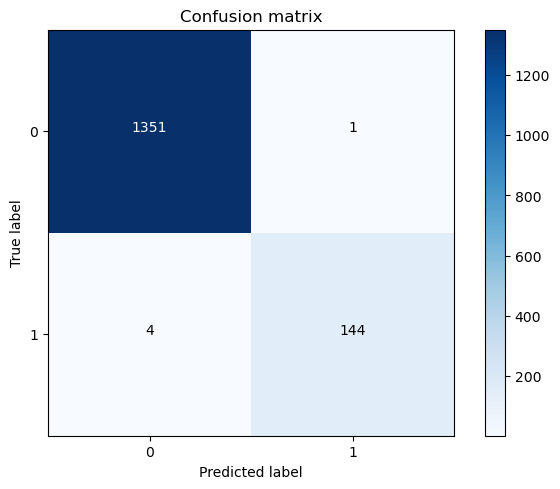

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Assuming you have the data loaded into original_Xtrain, original_ytrain, original_Xtest, and original_ytest

# Initialize StratifiedShuffleSplit for cross-validation
sss = StratifiedShuffleSplit(n_splits=7, test_size=0.0015, random_state=42)

# Initialize the model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=30))  # Update input_dim to 29
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Initialize scaler
scaler = RobustScaler()
history_list = []

# Initialize an array to store accuracy scores for each fold
accuracy_scores = []

for train_val_index, test_val_index in sss.split(original_Xtrain, original_ytrain):
    X_train, X_val = original_Xtrain.iloc[train_val_index], original_Xtrain.iloc[test_val_index]
    y_train, y_val = original_ytrain.iloc[train_val_index], original_ytrain.iloc[test_val_index]

    train_val_data = X_train
    train_val_data = train_val_data.assign(Class=y_train)
    print(train_val_data)

    fraud_df = train_val_data.loc[train_val_data['Class'] == 1]
    non_fraud_df = train_val_data.loc[train_val_data['Class'] == 0].sample(len(fraud_df))

    print(f'Relation fraud non-fraud in the CV set: {len(fraud_df)} x {len(non_fraud_df)}')

    print(f'Relação treino teste {len(non_fraud_df)+len(fraud_df)} x {len(y_val)}')
    print(f'Relação treino teste {(len(non_fraud_df)+len(fraud_df))/(len(non_fraud_df)+len(fraud_df)+len(y_val))} x {len(y_val)/(len(non_fraud_df)+len(fraud_df)+len(y_val))}')
        
        
        
    X_train_resampled = pd.concat([fraud_df, non_fraud_df]).drop('Class', axis=1)
    y_train_resampled = pd.concat([fraud_df, non_fraud_df])['Class']
    
    print(X_train_resampled)

    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_val_scaled = scaler.transform(X_val)

    # Fit the model
    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    history = model.fit(x=X_train_scaled, y=y_train_resampled, epochs=10, validation_data=(X_val_scaled, y_val),
                        callbacks=[early_stop])

    history_list.append(history.history)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_val_scaled, y_val)
    print(f"Validation Accuracy: {accuracy}")
    accuracy_scores.append(accuracy)

# Print the average accuracy across all folds
print(f"Average Accuracy Neural Network: {np.mean(accuracy_scores)}")

# Evaluate the model on the test set
X_test_scaled = scaler.transform(original_Xtest)
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate the confusion matrix
conf_matrix = confusion_matrix(original_ytest, y_pred)

# Print the classification report
print("\nClassification Report:\n", classification_report(original_ytest, y_pred))
print("Recall: ", recall_score(original_ytest, y_pred))

# Plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion matrix')
plt.show()



47/47 [==============================] - 0s 3ms/step


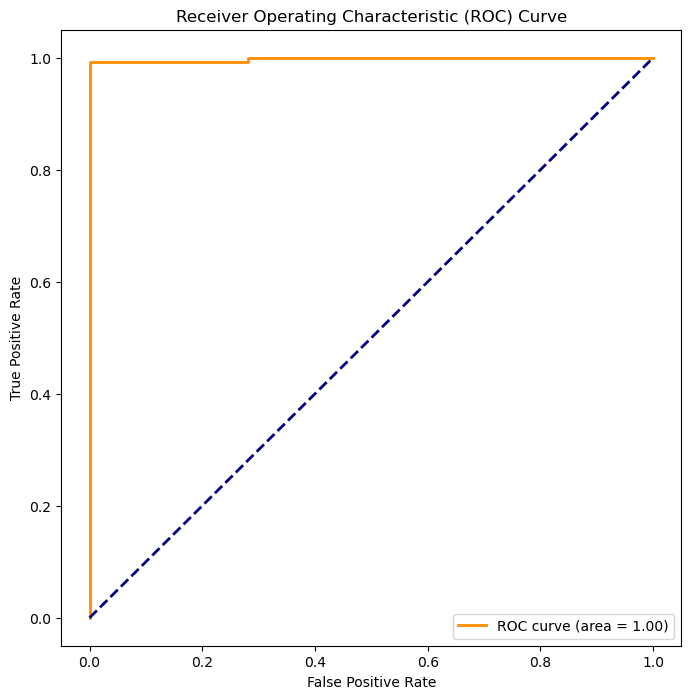

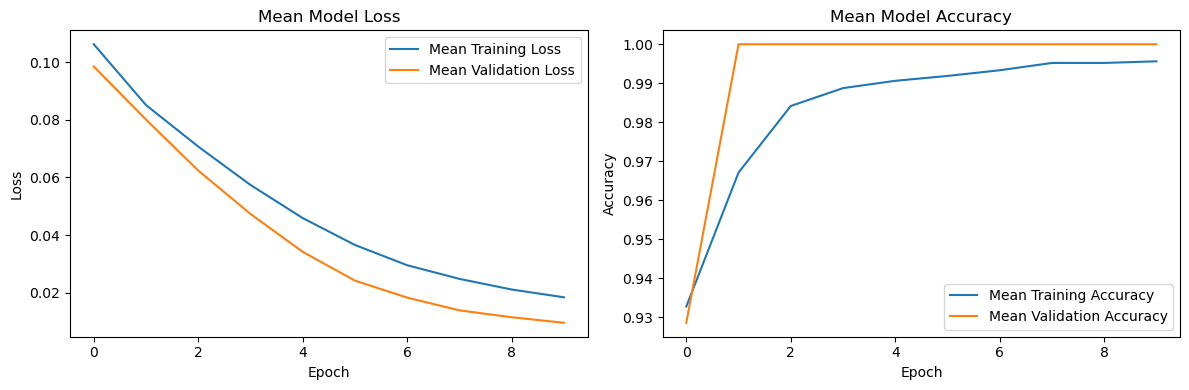

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have the following functions available
# If not, implement or import them from scikit-learn

# Assuming model is already trained and you have X_test and y_test
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)


# Plot ROC curve
fpr, tpr, _ = roc_curve(original_ytest, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Find the minimum length of histories
min_length = min(len(history['loss']) for history in history_list)

# Truncate or pad histories to have the same length
truncated_histories = []
for history in history_list:
    truncated_history = {
        'loss': history['loss'][:min_length],
        'val_loss': history['val_loss'][:min_length],
        'accuracy': history['accuracy'][:min_length],
        'val_accuracy': history['val_accuracy'][:min_length]
    }
    truncated_histories.append(truncated_history)

# Calculate mean values for each epoch
mean_loss = np.mean([history['loss'] for history in truncated_histories], axis=0)
mean_val_loss = np.mean([history['val_loss'] for history in truncated_histories], axis=0)
mean_accuracy = np.mean([history['accuracy'] for history in truncated_histories], axis=0)
mean_val_accuracy = np.mean([history['val_accuracy'] for history in truncated_histories], axis=0)

# Plot mean training/validation loss and accuracy
plt.figure(figsize=(12, 4))

# Plot Mean Loss
plt.subplot(1, 2, 1)
plt.plot(mean_loss, label='Mean Training Loss')
plt.plot(mean_val_loss, label='Mean Validation Loss')
plt.title('Mean Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Mean Accuracy
plt.subplot(1, 2, 2)
plt.plot(mean_accuracy, label='Mean Training Accuracy')
plt.plot(mean_val_accuracy, label='Mean Validation Accuracy')
plt.title('Mean Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import RandomOverSampler

# Assuming you have the data loaded into original_Xtrain, original_ytrain, original_Xtest, and original_ytest

# Initialize StratifiedShuffleSplit for cross-validation
sss = StratifiedShuffleSplit(n_splits=7, test_size=0.45, random_state=42)

# Initialize the model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=30))  # Update input_dim to 30
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Initialize scaler
scaler = RobustScaler()

# Initialize an array to store accuracy scores for each fold
accuracy_scores = []

for train_val_index, test_val_index in sss.split(original_Xtrain, original_ytrain):
    Xtrain, X_val = original_Xtrain.iloc[train_val_index], original_Xtrain.iloc[test_val_index]
    ytrain, y_val = original_ytrain.iloc[train_val_index], original_ytrain.iloc[test_val_index]

    # Use RandomOverSampler to oversample the minority class
    oversampler = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = oversampler.fit_resample(Xtrain, ytrain)

    print(f"Class distribution after oversampling: {len(y_train_resampled[y_train_resampled==0])} x {len(y_train_resampled[y_train_resampled==1])}")

    print(f'Relação treino teste {len(y_train_resampled)} x {len(y_val)}')
    print(f'Relação treino teste {(len(y_train_resampled))/(len(y_train_resampled)+len(y_val))} x {len(y_val)/(len(y_train_resampled)+len(y_val))}')
        
        
    train_val_data = pd.concat([X_train_resampled, pd.Series(y_train_resampled, name='Class')], axis=1)

    fraud_df = train_val_data.loc[train_val_data['Class'] == 1]
    non_fraud_df = train_val_data.loc[train_val_data['Class'] == 0].sample(len(fraud_df))

    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_val_scaled = scaler.transform(X_val)

    # Fit the model
    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    history = model.fit(x=X_train_scaled, y=y_train_resampled, epochs=500, validation_data=(X_val_scaled, y_val),
                        callbacks=[early_stop])

    history_list.append(history.history)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_val_scaled, y_val)
    print(f"Validation Accuracy: {accuracy}")
    accuracy_scores.append(accuracy)

# Print the average accuracy across all folds
print(f"Average Accuracy Neural Network: {np.mean(accuracy_scores)}")

# Evaluate the model on the test set
X_test_scaled = scaler.transform(original_Xtest)
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate the confusion matrix
conf_matrix = confusion_matrix(original_ytest, y_pred)

# Print the classification report
print("\nClassification Report:\n", classification_report(original_ytest, y_pred))
print("Recall: ", recall_score(original_ytest, y_pred))

# Plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion matrix')
plt.show()



ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (c:\Users\iraha\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

2671/2671 [==============================] - 4s 1ms/step


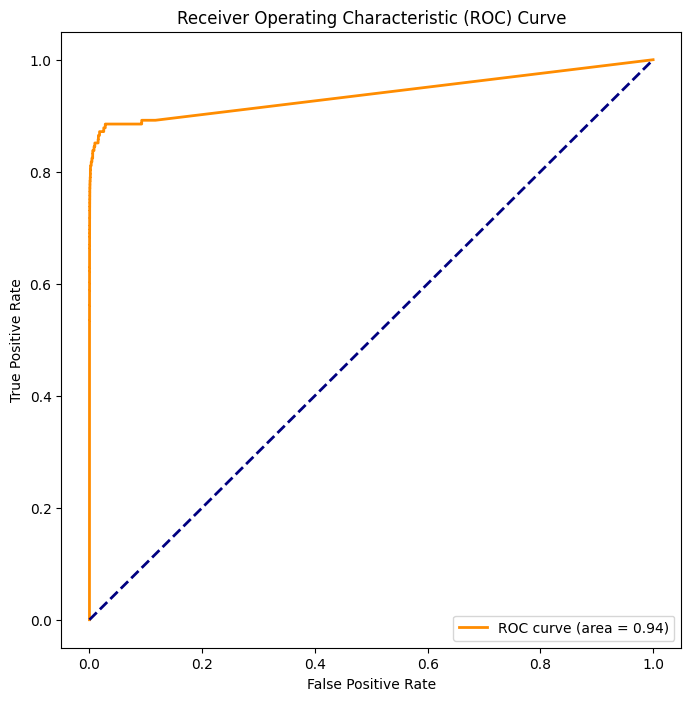

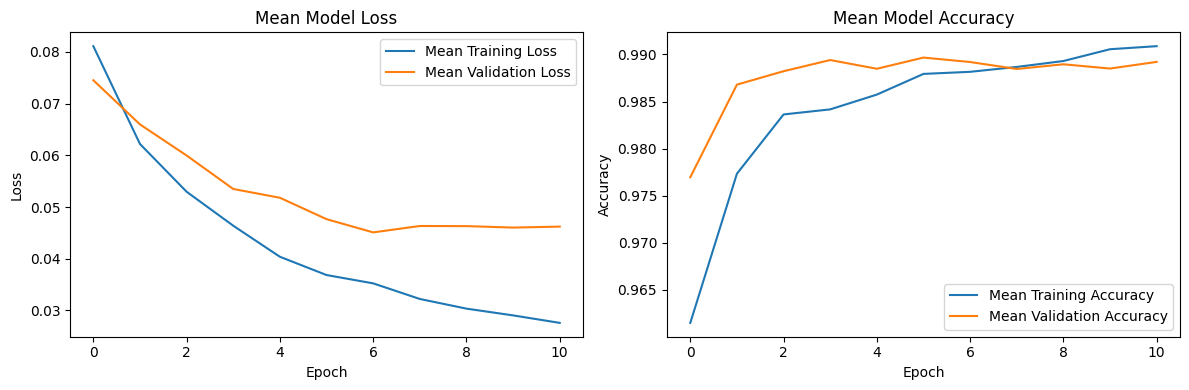

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have the following functions available
# If not, implement or import them from scikit-learn

# Assuming model is already trained and you have X_test and y_test
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)


# Plot ROC curve
fpr, tpr, _ = roc_curve(original_ytest, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Find the minimum length of histories
min_length = min(len(history['loss']) for history in history_list)

# Truncate or pad histories to have the same length
truncated_histories = []
for history in history_list:
    truncated_history = {
        'loss': history['loss'][:min_length],
        'val_loss': history['val_loss'][:min_length],
        'accuracy': history['accuracy'][:min_length],
        'val_accuracy': history['val_accuracy'][:min_length]
    }
    truncated_histories.append(truncated_history)

# Calculate mean values for each epoch
mean_loss = np.mean([history['loss'] for history in truncated_histories], axis=0)
mean_val_loss = np.mean([history['val_loss'] for history in truncated_histories], axis=0)
mean_accuracy = np.mean([history['accuracy'] for history in truncated_histories], axis=0)
mean_val_accuracy = np.mean([history['val_accuracy'] for history in truncated_histories], axis=0)

# Plot mean training/validation loss and accuracy
plt.figure(figsize=(12, 4))

# Plot Mean Loss
plt.subplot(1, 2, 1)
plt.plot(mean_loss, label='Mean Training Loss')
plt.plot(mean_val_loss, label='Mean Validation Loss')
plt.title('Mean Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Mean Accuracy
plt.subplot(1, 2, 2)
plt.plot(mean_accuracy, label='Mean Training Accuracy')
plt.plot(mean_val_accuracy, label='Mean Validation Accuracy')
plt.title('Mean Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()